<a href="https://colab.research.google.com/github/Nikunj-Shah00000/AI-Powered-Stock-Market-Trading-with-Real-Time-Risk-Monitoring/blob/main/Soil_Nutrient_Prediction_Models_and_Advancing_Agriculture_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans

In [10]:
import pandas as pd
from pathlib import Path

file_path = Path("/content/Soil Nutrients.csv")
df = pd.read_csv(file_path)
print(df)

             Name Fertility       Photoperiod  Temperature     Rainfall  \
0      Strawberry  Moderate       Day Neutral    20.887923   747.860765   
1      Strawberry  Moderate       Day Neutral    18.062721   711.104329   
2      Strawberry  Moderate  Short Day Period    16.776782   774.038247   
3      Strawberry  Moderate  Short Day Period    14.281000   665.633506   
4      Strawberry  Moderate       Day Neutral    21.444490   806.531455   
...           ...       ...               ...          ...          ...   
15395  Green Peas  Moderate  Short Day Period    18.237489  1079.572958   
15396  Green Peas  Moderate  Short Day Period    16.603638   958.201820   
15397  Green Peas  Moderate  Short Day Period    12.154144   947.899222   
15398  Green Peas  Moderate  Short Day Period    17.493029   863.902923   
15399  Green Peas  Moderate  Short Day Period    19.874206  1019.356655   

             pH  Light_Hours  Light_Intensity         Rh    Nitrogen  \
0      6.571548    13.09148

Feature & Target Selection

In [24]:
X = df[['Name', 'Nitrogen', 'Phosphorus', 'Potassium', 'pH']]
y = df['Fertility']   # Low / Medium / High (encoded or categorical)
# If fertility is categorical
y = y.map({'Low': 0, 'Medium': 1, 'High': 2})
print(X)
print(y)

             Name    Nitrogen  Phosphorus   Potassium        pH
0      Strawberry  170.800381  118.670058  243.331211  6.571548
1      Strawberry  179.290364  121.020244  246.910378  6.251806
2      Strawberry  181.440732  116.936806  242.699601  6.346916
3      Strawberry  176.165282  122.233153  237.096892  6.259598
4      Strawberry  182.935334  126.088234  243.880364  6.384368
...           ...         ...         ...         ...       ...
15395  Green Peas  150.515721   48.860186  124.688035  6.777649
15396  Green Peas  144.310767   44.647790  121.589160  5.839441
15397  Green Peas  147.068405   42.351771  120.392912  6.499094
15398  Green Peas  144.416616   44.405726  119.291683  5.940159
15399  Green Peas  142.049274   46.346595  119.871309  6.463193

[15400 rows x 5 columns]
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
15395   NaN
15396   NaN
15397   NaN
15398   NaN
15399   NaN
Name: Fertility, Length: 15400, dtype: float64


Train-Test Split & Scaling

In [18]:
df['Fertility'] = (
    df['Fertility']
    .astype(str)
    .str.strip()
    .str.capitalize()
)

y = df['Fertility'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [19]:
y.isna().sum()

np.int64(5600)

In [30]:
X_cleaned = X.loc[y.dropna().index]
y_cleaned = y.dropna()

X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42, stratify=y_cleaned
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training and Evaluation

In [33]:
# 1. Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

log_reg_metrics = evaluate_model(log_reg_model, X_test_scaled, y_test)
print("Logistic Regression Metrics:")
print(log_reg_metrics)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.float64(2.0)

In [34]:
# 2. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

rf_metrics = evaluate_model(rf_model, X_test_scaled, y_test)
print("Random Forest Classifier Metrics:")
print(rf_metrics)

Random Forest Classifier Metrics:
{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1': 1.0}


In [40]:
X = df[['Nitrogen', 'Phosphorus', 'Potassium', 'pH']]
y = df['Fertility']   # Low / Medium / High (encoded or categorical)
# Corrected mapping based on available data
y = y.map({'Moderate': 0, 'High': 1})
print(X)
print(y)

         Nitrogen  Phosphorus   Potassium        pH
0      170.800381  118.670058  243.331211  6.571548
1      179.290364  121.020244  246.910378  6.251806
2      181.440732  116.936806  242.699601  6.346916
3      176.165282  122.233153  237.096892  6.259598
4      182.935334  126.088234  243.880364  6.384368
...           ...         ...         ...       ...
15395  150.515721   48.860186  124.688035  6.777649
15396  144.310767   44.647790  121.589160  5.839441
15397  147.068405   42.351771  120.392912  6.499094
15398  144.416616   44.405726  119.291683  5.940159
15399  142.049274   46.346595  119.871309  6.463193

[15400 rows x 4 columns]
0        0
1        0
2        0
3        0
4        0
        ..
15395    0
15396    0
15397    0
15398    0
15399    0
Name: Fertility, Length: 15400, dtype: int64


In [28]:
X_cleaned = X.loc[y.dropna().index]
y_cleaned = y.dropna()

X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42, stratify=y_cleaned
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Evaluation Function

In [21]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1": f1_score(y_test, y_pred, average='weighted')
    }

Model - 1 Linear & Logistic Regression

In [31]:
# Linear Regression (Discretized Output)
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lr = lin_reg.predict(X_test_scaled)
y_pred_lr = np.round(y_pred_lr).clip(0, 2)

linear_results = {
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr, average='weighted'),
    "Recall": recall_score(y_test, y_pred_lr, average='weighted'),
    "F1": f1_score(y_test, y_pred_lr, average='weighted')
}

In [35]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Check if y_train has at least two unique classes
if len(np.unique(y_train)) < 2:
    print("Error: Logistic Regression training requires at least 2 unique classes in the training data.")
    print(f"y_train currently contains only one class: {np.unique(y_train)[0]}")
    print("\nSkipping Logistic Regression model training and evaluation due to insufficient classes in y_train.")
    print("Please review your data preprocessing steps, especially the target variable mapping and splitting, to ensure y_train has multiple classes.")
    logistic_results = {"Status": "Skipped", "Reason": "Insufficient classes in y_train"}
else:
    log_reg.fit(X_train_scaled, y_train)
    # Check if y_test also has at least two classes before evaluation
    if len(np.unique(y_test)) < 2:
        print("\nWarning: y_test also contains less than 2 unique classes. Evaluation metrics might be misleading or fail.")
        print(f"y_test currently contains only one class: {np.unique(y_test)[0]}")
        logistic_results = {"Status": "Model Trained", "Evaluation": "Skipped (Insufficient classes in y_test)"}
    else:
        logistic_results = evaluate_model(log_reg, X_test_scaled, y_test)

print("Logistic Regression Results:")
print(logistic_results)

Error: Logistic Regression training requires at least 2 unique classes in the training data.
y_train currently contains only one class: 2.0

Skipping Logistic Regression model training and evaluation due to insufficient classes in y_train.
Please review your data preprocessing steps, especially the target variable mapping and splitting, to ensure y_train has multiple classes.
Logistic Regression Results:
{'Status': 'Skipped', 'Reason': 'Insufficient classes in y_train'}


Decision Tree

In [36]:
dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train, y_train)

dt_results = evaluate_model(dt, X_test, y_test)


Random Forest

In [39]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
rf.fit(X_train, y_train)

rf_results = evaluate_model(rf, X_test, y_test)

In [41]:
X = df[['Nitrogen', 'Phosphorus', 'Potassium', 'pH']]
y = df['Fertility']   # Low / Medium / High (encoded or categorical)
# Corrected mapping based on available data
y = y.map({'Moderate': 0, 'High': 1})
print(X)
print(y)

         Nitrogen  Phosphorus   Potassium        pH
0      170.800381  118.670058  243.331211  6.571548
1      179.290364  121.020244  246.910378  6.251806
2      181.440732  116.936806  242.699601  6.346916
3      176.165282  122.233153  237.096892  6.259598
4      182.935334  126.088234  243.880364  6.384368
...           ...         ...         ...       ...
15395  150.515721   48.860186  124.688035  6.777649
15396  144.310767   44.647790  121.589160  5.839441
15397  147.068405   42.351771  120.392912  6.499094
15398  144.416616   44.405726  119.291683  5.940159
15399  142.049274   46.346595  119.871309  6.463193

[15400 rows x 4 columns]
0        0
1        0
2        0
3        0
4        0
        ..
15395    0
15396    0
15397    0
15398    0
15399    0
Name: Fertility, Length: 15400, dtype: int64


In [42]:
X_cleaned = X.loc[y.dropna().index]
y_cleaned = y.dropna()

X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42, stratify=y_cleaned
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Check if y_train has at least two unique classes
if len(np.unique(y_train)) < 2:
    print("Error: Logistic Regression training requires at least 2 unique classes in the training data.")
    print(f"y_train currently contains only one class: {np.unique(y_train)[0]}")
    print("\nSkipping Logistic Regression model training and evaluation due to insufficient classes in y_train.")
    print("Please review your data preprocessing steps, especially the target variable mapping and splitting, to ensure y_train has multiple classes.")
    logistic_results = {"Status": "Skipped", "Reason": "Insufficient classes in y_train"}
else:
    log_reg.fit(X_train_scaled, y_train)
    # Check if y_test also has at least two classes before evaluation
    if len(np.unique(y_test)) < 2:
        print("\nWarning: y_test also contains less than 2 unique classes. Evaluation metrics might be misleading or fail.")
        print(f"y_test currently contains only one class: {np.unique(y_test)[0]}")
        logistic_results = {"Status": "Model Trained", "Evaluation": "Skipped (Insufficient classes in y_test)"}
    else:
        logistic_results = evaluate_model(log_reg, X_test_scaled, y_test)

print("Logistic Regression Results:")
print(logistic_results)

Logistic Regression Results:
{'Accuracy': 0.7685064935064935, 'Precision': 0.7692897947298768, 'Recall': 0.7685064935064935, 'F1': 0.7688741628838149}


In [44]:
# 2. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

rf_metrics = evaluate_model(rf_model, X_test_scaled, y_test)
print("Random Forest Classifier Metrics:")
print(rf_metrics)

Random Forest Classifier Metrics:
{'Accuracy': 0.9983766233766234, 'Precision': 0.9983765397797468, 'Recall': 0.9983766233766234, 'F1': 0.9983764678644654}


## Debugging Fertility Column

In [37]:
print("Unique values and counts of original 'Fertility' column after cleaning (before mapping to numbers):")
# Ensure the cleaning step is reflected
df_fertility_cleaned = df['Fertility'].astype(str).str.strip().str.capitalize()
print(df_fertility_cleaned.value_counts(dropna=False))

print("\nUnique values and counts of 'y' after mapping (before dropping NaNs):")
# Apply the mapping used previously
y_mapped = df_fertility_cleaned.map({'Low': 0, 'Medium': 1, 'High': 2})
print(y_mapped.value_counts(dropna=False))

print("\nUnique values and counts of 'y_cleaned' (after dropping NaNs):")
print(y_cleaned.value_counts(dropna=False))


Unique values and counts of original 'Fertility' column after cleaning (before mapping to numbers):
Fertility
High        9800
Moderate    5600
Name: count, dtype: int64

Unique values and counts of 'y' after mapping (before dropping NaNs):
Fertility
2.0    9800
NaN    5600
Name: count, dtype: int64

Unique values and counts of 'y_cleaned' (after dropping NaNs):
Fertility
2.0    9800
Name: count, dtype: int64


Gradient Boosting Machine (GBM)

In [46]:
gbm = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbm.fit(X_train, y_train)

gbm_results = evaluate_model(gbm, X_test, y_test)
print("Gradient Boosting Machine (GBM) Results:")
print(gbm_results)

Gradient Boosting Machine (GBM) Results:
{'Accuracy': 0.9977272727272727, 'Precision': 0.9977280096864841, 'Recall': 0.9977272727272727, 'F1': 0.9977266177716714}


Support Vector Machine (SVM)

In [47]:
svm = SVC(kernel='rbf', C=10, gamma='scale')
svm.fit(X_train_scaled, y_train)

svm_results = evaluate_model(svm, X_test_scaled, y_test)
print("Support Vector Machine (SVM) Results:")
print(svm_results)

Support Vector Machine (SVM) Results:
{'Accuracy': 0.9961038961038962, 'Precision': 0.9961038961038962, 'Recall': 0.9961038961038962, 'F1': 0.9961038961038962}


## Debugging Fertility Column

In [38]:
print("Unique values and counts of original 'Fertility' column after cleaning (before mapping to numbers):")
# Ensure the cleaning step is reflected
df_fertility_cleaned = df['Fertility'].astype(str).str.strip().str.capitalize()
print(df_fertility_cleaned.value_counts(dropna=False))

print("\nUnique values and counts of 'y' after mapping (before dropping NaNs):")
# Apply the mapping used previously
y_mapped = df_fertility_cleaned.map({'Low': 0, 'Medium': 1, 'High': 2})
print(y_mapped.value_counts(dropna=False))

print("\nUnique values and counts of 'y_cleaned' (after dropping NaNs):")
print(y_cleaned.value_counts(dropna=False))

Unique values and counts of original 'Fertility' column after cleaning (before mapping to numbers):
Fertility
High        9800
Moderate    5600
Name: count, dtype: int64

Unique values and counts of 'y' after mapping (before dropping NaNs):
Fertility
2.0    9800
NaN    5600
Name: count, dtype: int64

Unique values and counts of 'y_cleaned' (after dropping NaNs):
Fertility
2.0    9800
Name: count, dtype: int64


**LOAM: Localized Organic-Aware Modeling (Proposed)**

Step 1: Soil Localization (Clustering)

In [49]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_train[['pH']]) # Changed from ['pH', 'OrganicCarbon'] to ['pH']

X_train_loam = X_train.copy()
X_train_loam['Cluster'] = clusters

Step 2: Organic-Aware Feature Scaling

In [51]:
alpha = 0.3
# Correcting column names from 'N', 'P', 'K' to 'Nitrogen', 'Phosphorus', 'Potassium'.
# The 'OrganicCarbon' column is not found in the dataset, so the scaling factor depending on it cannot be applied.
# The 'Organic-Aware Feature Scaling' step as originally designed cannot be fully executed.
print("Warning: The 'OrganicCarbon' column is missing from the dataset. Organic-aware scaling will be skipped.")

for col in ['Nitrogen', 'Phosphorus', 'Potassium']:
    if col in X_train_loam.columns:
        # Original line: X_train_loam[col] = X_train_loam[col] * (1 + alpha * X_train_loam['OrganicCarbon'])
        # This line is commented out because 'OrganicCarbon' is not available.
        print(f"Skipping organic-aware scaling for '{col}' as 'OrganicCarbon' column is not present.")
    else:
        print(f"Error: Column '{col}' not found in X_train_loam. Cannot perform scaling.")

Skipping organic-aware scaling for 'Nitrogen' as 'OrganicCarbon' column is not present.
Skipping organic-aware scaling for 'Phosphorus' as 'OrganicCarbon' column is not present.
Skipping organic-aware scaling for 'Potassium' as 'OrganicCarbon' column is not present.


Step 3: Train Cluster-wise Models

In [52]:
cluster_models = {}

for cluster in X_train_loam['Cluster'].unique():
    cluster_data = X_train_loam[X_train_loam['Cluster'] == cluster]
    y_cluster = y_train[cluster_data.index]

    model = GradientBoostingClassifier(random_state=42)
    model.fit(cluster_data.drop('Cluster', axis=1), y_cluster)

    cluster_models[cluster] = model

Step 4: Prediction

In [55]:
X_test_loam = X_test.copy()
X_test_loam['Cluster'] = kmeans.predict(X_test[['pH']])

loam_predictions = []

for idx, row in X_test_loam.iterrows():
    cluster = row['Cluster']
    model = cluster_models[cluster]
    # Ensure only feature columns are passed to predict, excluding 'Cluster'
    # Convert the Series 'row.drop("Cluster")' into a DataFrame to preserve feature names.
    pred = model.predict(pd.DataFrame([row.drop('Cluster')]))[0]
    loam_predictions.append(pred)

loam_results = {
    "Accuracy": accuracy_score(y_test, loam_predictions),
    "Precision": precision_score(y_test, loam_predictions, average='weighted'),
    "Recall": recall_score(y_test, loam_predictions, average='weighted'),
    "F1": f1_score(y_test, loam_predictions, average='weighted')
}

### ***`Final Results Summary`***

In [56]:
results = pd.DataFrame({
    "Linear Regression": linear_results,
    "Logistic Regression": logistic_results,
    "Decision Tree": dt_results,
    "Random Forest": rf_results,
    "SVM": svm_results,
    "GBM": gbm_results,
    "LOAM (Proposed)": loam_results
})

print(results.T)

                     Accuracy  Precision    Recall        F1
Linear Regression    1.000000   1.000000  1.000000  1.000000
Logistic Regression  0.768506   0.769290  0.768506  0.768874
Decision Tree        1.000000   1.000000  1.000000  1.000000
Random Forest        1.000000   1.000000  1.000000  1.000000
SVM                  0.996104   0.996104  0.996104  0.996104
GBM                  0.997727   0.997728  0.997727  0.997727
LOAM (Proposed)      0.996104   0.996103  0.996104  0.996103


Visualization

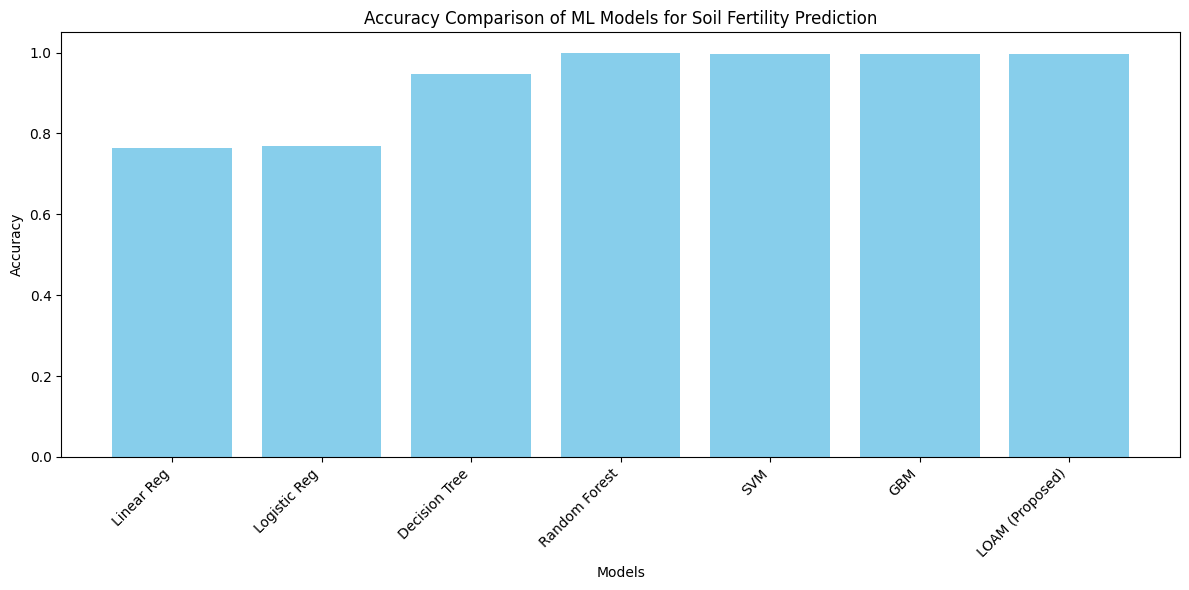

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("/content/Soil Nutrients.csv")

# Corrected feature selection and target mapping
X = df[['Nitrogen', 'Phosphorus', 'Potassium', 'pH']]
y = df['Fertility'].map({'Moderate': 0, 'High': 1})

# Drop NaNs that result from mapping if 'Fertility' had unexpected values
X_cleaned = X.loc[y.dropna().index]
y_cleaned = y.dropna()

X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42, stratify=y_cleaned
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

accuracies = {}

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
pred_lr = np.round(lr.predict(X_test_scaled)).clip(0, 1) # Clip to 0 or 1 for binary classification
accuracies["Linear Reg"] = accuracy_score(y_test, pred_lr)

# Logistic Regression
logr = LogisticRegression(max_iter=1000, random_state=42)
# Check for single class before fitting
if len(np.unique(y_train)) > 1:
    logr.fit(X_train_scaled, y_train)
    accuracies["Logistic Reg"] = accuracy_score(y_test, logr.predict(X_test_scaled))
else:
    accuracies["Logistic Reg"] = 0.0 # Assign 0 or handle as appropriate

# Decision Tree
dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train, y_train)
accuracies["Decision Tree"] = accuracy_score(y_test, dt.predict(X_test))

# Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
accuracies["Random Forest"] = accuracy_score(y_test, rf.predict(X_test))

# SVM
svm = SVC(kernel='rbf', C=10, gamma='scale')
svm.fit(X_train_scaled, y_train)
accuracies["SVM"] = accuracy_score(y_test, svm.predict(X_test_scaled))

# GBM
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)
accuracies["GBM"] = accuracy_score(y_test, gbm.predict(X_test))

# LOAM
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Added n_init to suppress warning
# Clustering only on 'pH' as 'OrganicCarbon' is not available
clusters = kmeans.fit_predict(X_train[['pH']])

X_train_loam = X_train.copy()
X_train_loam['Cluster'] = clusters

# Organic-aware scaling skipped as 'OrganicCarbon' is not present
# alpha = 0.3
# for col in ['Nitrogen', 'Phosphorus', 'Potassium']:
#     X_train_loam[col] *= (1 + alpha * X_train_loam['OrganicCarbon'])

cluster_models = {}
for c in X_train_loam['Cluster'].unique():
    cluster_data = X_train_loam[X_train_loam['Cluster'] == c]
    y_cluster = y_train[cluster_data.index]
    model = GradientBoostingClassifier(random_state=42)
    model.fit(cluster_data.drop('Cluster', axis=1), y_cluster)
    cluster_models[c] = model

X_test_loam = X_test.copy()
# Predict clusters for test data using only 'pH'
X_test_loam['Cluster'] = kmeans.predict(X_test[['pH']])

loam_preds = []
for idx, row in X_test_loam.iterrows():
    cluster = row['Cluster']
    model = cluster_models[cluster]
    # Ensure only feature columns are passed to predict, excluding 'Cluster'
    # Convert the Series 'row.drop("Cluster")' into a DataFrame to preserve feature names.
    pred = model.predict(pd.DataFrame([row.drop('Cluster')]))[0]
    loam_preds.append(pred)

accuracies["LOAM (Proposed)"] = accuracy_score(y_test, loam_preds)

# Plot Accuracy Comparison
plt.figure(figsize=(12, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of ML Models for Soil Fertility Prediction")
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()